## 1. Import Library

In [548]:
import pandas as pd 
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import math

## 2. Read Dataset

In [549]:
data_weather = pd.read_csv('weatherHistory.csv')
data_weather

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


## 3. Exploratory Data Analysis

### a. Check Missing Value 

In [550]:
data_weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

### b. Check Data Information

In [551]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


### c. Check Description Dataset

In [552]:
data_weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### d. Dataset Visualization  

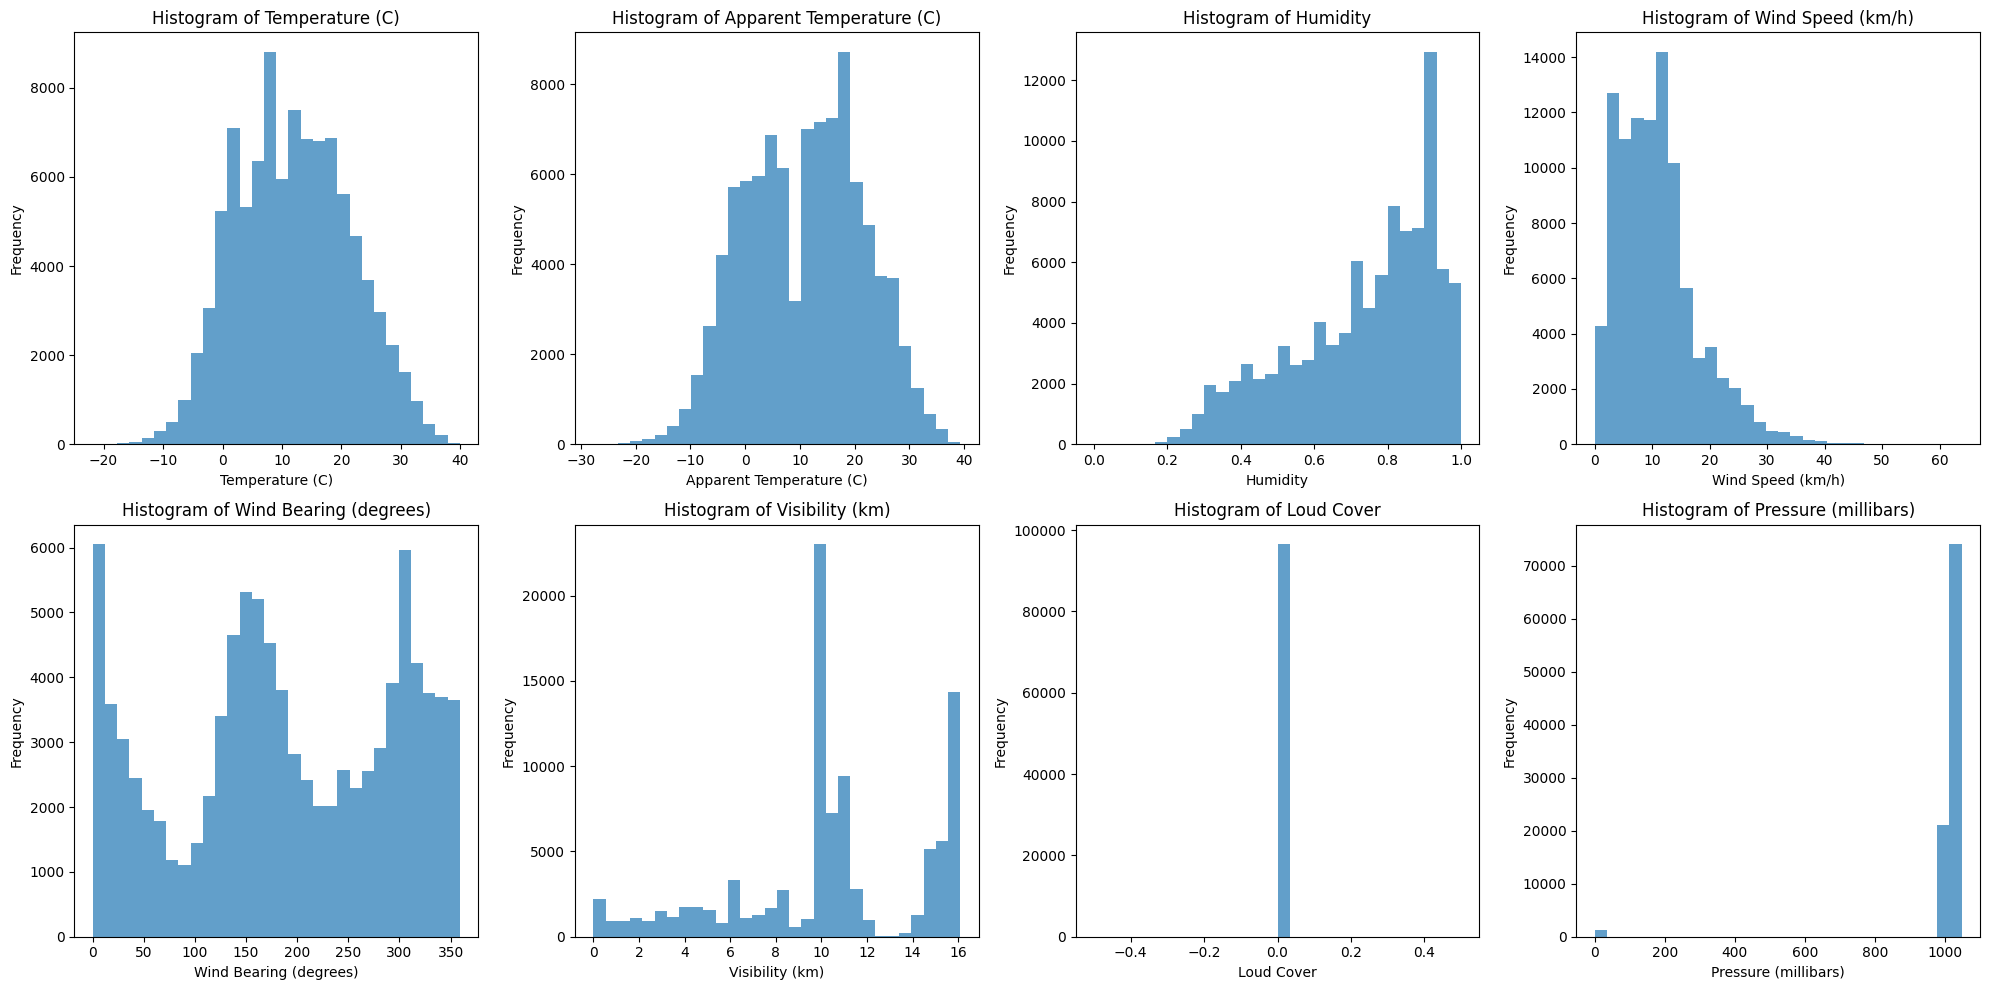

In [553]:
cols = data_weather.select_dtypes(include='number').columns

n_cols = 4
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, item in enumerate(cols):
    axes[i].hist(data_weather[item].dropna(), bins=30, alpha=0.7)
    axes[i].set_title(f'Histogram of {item}')
    axes[i].set_xlabel(item)
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 4. Preprocessing

### a. Convert Datetime

In [554]:
# ulangi dari kolom, bukan index
data_weather.reset_index(drop=True, inplace=True)

data_weather['Formatted Date'] = pd.to_datetime(
    data_weather['Formatted Date'],
    utc=True,        # paksa semua jadi UTC
    errors='coerce'
)

data_weather = data_weather.dropna(subset=['Formatted Date'])

# hilangkan timezone
data_weather['Formatted Date'] = data_weather['Formatted Date'].dt.tz_convert(None)

# set index
data_weather = data_weather.set_index('Formatted Date')

In [555]:
data_weather = data_weather.select_dtypes(include='number').resample('D').mean()
data_weather.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Formatted Date,,,,,,,,
2005-12-31,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,0.0,1016.660000
2006-01-01,4.075000,-0.174537,0.817083,21.229192,142.750000,11.348487,0.0,1011.985000
2006-01-02,5.263194,1.808796,0.847083,17.824713,164.583333,8.492079,0.0,1010.384167
2006-01-03,2.340509,0.445370,0.897083,7.726658,252.541667,9.223958,0.0,1021.170833
2006-01-04,2.251852,-0.663194,0.906667,12.152817,35.000000,8.352546,0.0,981.770833


In [556]:
data_weather

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Formatted Date,,,,,,,,
2005-12-31,0.577778,-4.050000,0.890000,17.114300,140.000000,9.982000,0.0,1016.660000
2006-01-01,4.075000,-0.174537,0.817083,21.229192,142.750000,11.348487,0.0,1011.985000
2006-01-02,5.263194,1.808796,0.847083,17.824713,164.583333,8.492079,0.0,1010.384167
2006-01-03,2.340509,0.445370,0.897083,7.726658,252.541667,9.223958,0.0,1021.170833
2006-01-04,2.251852,-0.663194,0.906667,12.152817,35.000000,8.352546,0.0,981.770833
...,...,...,...,...,...,...,...,...
2016-12-27,0.278009,-3.160417,0.890000,10.979529,185.875000,7.303362,0.0,1020.305833
2016-12-28,0.222222,-3.225926,0.890000,10.968125,186.083333,7.304704,0.0,1020.335833
2016-12-29,0.167824,-3.265509,0.889583,10.876892,186.041667,7.310071,0.0,1020.367083


In [557]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4019 entries, 2005-12-31 to 2016-12-31
Freq: D
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           4019 non-null   float64
 1   Apparent Temperature (C)  4019 non-null   float64
 2   Humidity                  4019 non-null   float64
 3   Wind Speed (km/h)         4019 non-null   float64
 4   Wind Bearing (degrees)    4019 non-null   float64
 5   Visibility (km)           4019 non-null   float64
 6   Loud Cover                4019 non-null   float64
 7   Pressure (millibars)      4019 non-null   float64
dtypes: float64(8)
memory usage: 282.6 KB


### b. Handle Missing Values 

In [558]:
data_weather.isnull().sum()

Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

### c. Select The Required Attributes

In [559]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4019 entries, 2005-12-31 to 2016-12-31
Freq: D
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           4019 non-null   float64
 1   Apparent Temperature (C)  4019 non-null   float64
 2   Humidity                  4019 non-null   float64
 3   Wind Speed (km/h)         4019 non-null   float64
 4   Wind Bearing (degrees)    4019 non-null   float64
 5   Visibility (km)           4019 non-null   float64
 6   Loud Cover                4019 non-null   float64
 7   Pressure (millibars)      4019 non-null   float64
dtypes: float64(8)
memory usage: 282.6 KB


### d. Split Dataset

In [560]:
from sklearn.model_selection import train_test_split

x = data_weather.drop(columns=['Temperature (C)'])
y = data_weather['Temperature (C)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### e. Normalization Dataset

In [561]:
from sklearn.preprocessing import StandardScaler 

std_scaler = StandardScaler()

x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)

## 5. Modelling Dataset

### a. XGBoost

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

df_xgb = data_weather[['Temperature (C)']].copy()


df_xgb['Lag_1'] = df_xgb['Temperature (C)'].shift(1) 
df_xgb['Lag_2'] = df_xgb['Temperature (C)'].shift(2)  
df_xgb['Lag_7'] = df_xgb['Temperature (C)'].shift(7)  
df_xgb['Rolling_Mean'] = df_xgb['Temperature (C)'].rolling(window=3).mean() 

df_xgb = df_xgb.dropna() 

X = df_xgb[['Lag_1', 'Lag_2', 'Lag_7', 'Rolling_Mean']]
y = df_xgb['Temperature (C)']

train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE XGBoost: {rmse:.4f}")

RMSE XGBoost: 0.4864


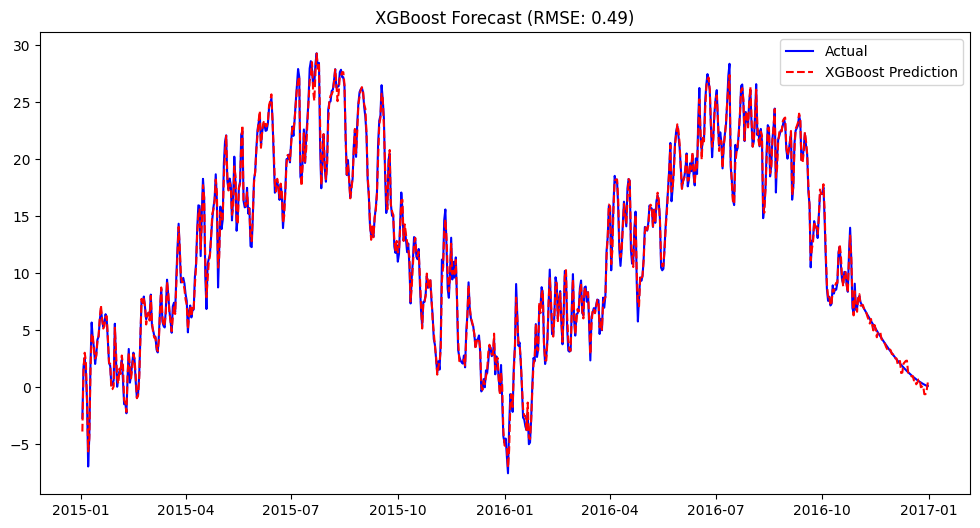

In [ ]:
plt.figure(figsize=(12, 6))

subset_y_test = y_test.iloc[-730:]
subset_y_pred = pd.Series(y_pred, index=y_test.index).iloc[-730:]

plt.plot(subset_y_test.index, subset_y_test, label='Actual', color='blue')
plt.plot(subset_y_pred.index, subset_y_pred, label='XGBoost Prediction', color='red', linestyle='--')
plt.title(f"XGBoost Forecast (RMSE: {rmse:.2f})")
plt.legend()
plt.show()

### b. Holt Winter Exponential Smoothing

In [564]:
df = data_weather.sort_index() 

train_size = int(len(df) * 0.8)

y_train = df['Temperature (C)'].iloc[:train_size]
y_test = df['Temperature (C)'].iloc[train_size:]

y_train.index.freq = 'D' 
y_test.index.freq = 'D'

In [565]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

model = ExponentialSmoothing(
    y_train,
    trend='add',
    seasonal='add',
    seasonal_periods=365
)

hw_model = model.fit()

y_pred = hw_model.forecast(len(y_test))

y_test_real = y_test.values.flatten()
y_pred_real = y_pred.values if hasattr(y_pred, "values") else y_pred

rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
print(f"RMSE (Celcius): {rmse:.4f}")

RMSE (Celcius): 6.1588


c:\Users\Nicolaus Prima\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


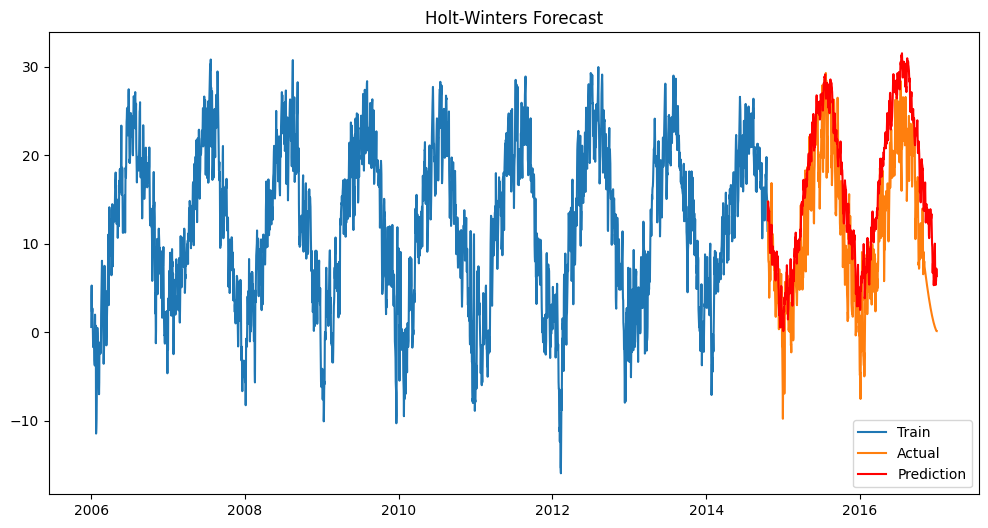

In [566]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_train.index, y_train, label="Train")
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Prediction", color="red")

plt.title("Holt-Winters Forecast")
plt.legend()
plt.show()

### c. Prophet

In [567]:
df_prophet = data_weather.reset_index()[['Formatted Date', 'Temperature (C)']]
df_prophet.columns = ['ds', 'y']

train_size = int(len(df_prophet) * 0.8)

train_df = df_prophet.iloc[:train_size]
test_df = df_prophet.iloc[train_size:]

In [568]:
from prophet import Prophet

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

model.fit(train_df)
forecast = model.predict(test_df)

future = model.make_future_dataframe(periods=len(test_df))
forecast = model.predict(future)

y_pred = forecast['yhat'].iloc[-len(test_df):].values
y_test = test_df['y'].values

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE Prophet:", rmse)

20:24:16 - cmdstanpy - INFO - Chain [1] start processing
20:24:16 - cmdstanpy - INFO - Chain [1] done processing


RMSE Prophet: 3.40322186074394


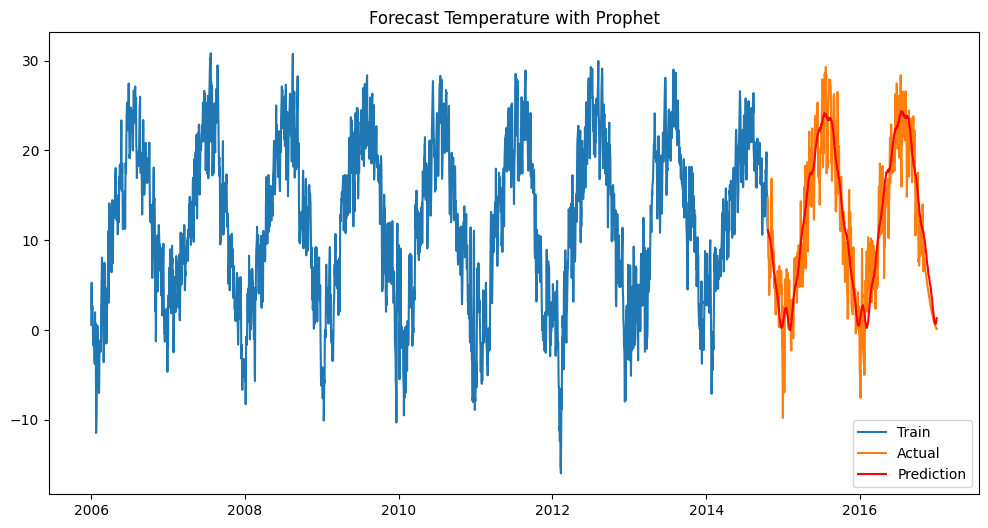

In [569]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train_df['ds'], train_df['y'], label="Train")
plt.plot(test_df['ds'], test_df['y'], label="Actual")
plt.plot(test_df['ds'], y_pred, label="Prediction", color="red")

plt.title("Forecast Temperature with Prophet")
plt.legend()
plt.show()